In [1]:
# first set this so that jupyter notebook prints all output from a cell, 
# not just the most recent one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# let's also suppress warnings, as they can get annoying sometimes
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

#Task 1: Data Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Load the data
Bank_data = pd.read_excel("Assignment2.xls", header = 1,names=['ID', 'Balance Limit', 'Sex', 'Education', 'Marital status', 
                            'Age', 'Pay Sep', 'Pay Aug', 'Pay July', 'Pay June', 'Pay May', 'Pay Apr', 'Bill Amt Sep', 
                            'Bill Amt Aug', 'Bill Amt July', 'Bill Amt June', 'Bill Amt May', 'Bill Amt Apr', 
                            'Prev Pay Amt Sep', 'Prev Pay Amt Aug', 'Prev Pay Amt July', 'Prev Pay Amt June', 
                            'Prev Pay Amt May', 'Prev Pay Amt Apr', 'Default Payment'])
#Drop ID column
Bank_data.drop(['ID'], axis=1, inplace=True)

Bank_data.head()

,Balance Limit,Sex,Education,Marital status,Age,Pay Sep,Pay Aug,Pay July,Pay June,Pay May,...,Bill Amt June,Bill Amt May,Bill Amt Apr,Prev Pay Amt Sep,Prev Pay Amt Aug,Prev Pay Amt July,Prev Pay Amt June,Prev Pay Amt May,Prev Pay Amt Apr,Default Payment
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
#Display information of dataset
print('Dataset info: ')
print('')
Bank_data.info()

#Check for missing values
print('')
print('Initial Null Counts: ')
print('')
Bank_data.isnull().sum()

Dataset info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
Balance Limit        30000 non-null int64
Sex                  30000 non-null int64
Education            30000 non-null int64
Marital status       30000 non-null int64
Age                  30000 non-null int64
Pay Sep              30000 non-null int64
Pay Aug              30000 non-null int64
Pay July             30000 non-null int64
Pay June             30000 non-null int64
Pay May              30000 non-null int64
Pay Apr              30000 non-null int64
Bill Amt Sep         30000 non-null int64
Bill Amt Aug         30000 non-null int64
Bill Amt July        30000 non-null int64
Bill Amt June        30000 non-null int64
Bill Amt May         30000 non-null int64
Bill Amt Apr         30000 non-null int64
Prev Pay Amt Sep     30000 non-null int64
Prev Pay Amt Aug     30000 non-null int64
Prev Pay Amt July    30000 non-null int64
Prev Pay Amt June    30000 non-null

Balance Limit        0
Sex                  0
Education            0
Marital status       0
Age                  0
Pay Sep              0
Pay Aug              0
Pay July             0
Pay June             0
Pay May              0
Pay Apr              0
Bill Amt Sep         0
Bill Amt Aug         0
Bill Amt July        0
Bill Amt June        0
Bill Amt May         0
Bill Amt Apr         0
Prev Pay Amt Sep     0
Prev Pay Amt Aug     0
Prev Pay Amt July    0
Prev Pay Amt June    0
Prev Pay Amt May     0
Prev Pay Amt Apr     0
Default Payment      0
dtype: int64

In [4]:
#Checking datatype of variables
print(Bank_data.dtypes)

Balance Limit        int64
Sex                  int64
Education            int64
Marital status       int64
Age                  int64
Pay Sep              int64
Pay Aug              int64
Pay July             int64
Pay June             int64
Pay May              int64
Pay Apr              int64
Bill Amt Sep         int64
Bill Amt Aug         int64
Bill Amt July        int64
Bill Amt June        int64
Bill Amt May         int64
Bill Amt Apr         int64
Prev Pay Amt Sep     int64
Prev Pay Amt Aug     int64
Prev Pay Amt July    int64
Prev Pay Amt June    int64
Prev Pay Amt May     int64
Prev Pay Amt Apr     int64
Default Payment      int64
dtype: object


In [5]:
#Display all columns
cols = Bank_data.columns
cols

Index([u'Balance Limit', u'Sex', u'Education', u'Marital status', u'Age',
       u'Pay Sep', u'Pay Aug', u'Pay July', u'Pay June', u'Pay May',
       u'Pay Apr', u'Bill Amt Sep', u'Bill Amt Aug', u'Bill Amt July',
       u'Bill Amt June', u'Bill Amt May', u'Bill Amt Apr', u'Prev Pay Amt Sep',
       u'Prev Pay Amt Aug', u'Prev Pay Amt July', u'Prev Pay Amt June',
       u'Prev Pay Amt May', u'Prev Pay Amt Apr', u'Default Payment'],
      dtype='object')

In [6]:
#Display numeric columns
num_cols = Bank_data._get_numeric_data().columns
num_cols

Index([u'Balance Limit', u'Sex', u'Education', u'Marital status', u'Age',
       u'Pay Sep', u'Pay Aug', u'Pay July', u'Pay June', u'Pay May',
       u'Pay Apr', u'Bill Amt Sep', u'Bill Amt Aug', u'Bill Amt July',
       u'Bill Amt June', u'Bill Amt May', u'Bill Amt Apr', u'Prev Pay Amt Sep',
       u'Prev Pay Amt Aug', u'Prev Pay Amt July', u'Prev Pay Amt June',
       u'Prev Pay Amt May', u'Prev Pay Amt Apr', u'Default Payment'],
      dtype='object')

In [7]:
#Check if all columns are of numeric datatype
list(set(cols) - set(num_cols))

[]

In [8]:
#Display all values of categorical columns
categoricalColumn = ['Sex', 'Education', 'Marital status', 
                     'Pay Sep', 'Pay Aug', 'Pay July', 'Pay June', 'Pay May', 'Pay Apr']

for col in categoricalColumn:
    print('Value Counts for ' + col)
    print(Bank_data[col].value_counts())
    print('')

Value Counts for Sex
2    18112
1    11888
Name: Sex, dtype: int64

Value Counts for Education
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: Education, dtype: int64

Value Counts for Marital status
2    15964
1    13659
3      323
0       54
Name: Marital status, dtype: int64

Value Counts for Pay Sep
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: Pay Sep, dtype: int64

Value Counts for Pay Aug
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: Pay Aug, dtype: int64

Value Counts for Pay July
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: Pay July, dtype: int64

Value Counts for Pay June
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6 

# Data Cleaning
As seen previously, some categories are mislabeled or undocumented. Before proceeding, it is time to fix it.

The 0 in `Marital status` can be safely categorized as 'Other' (thus 3).

The 0 (undocumented), 5 and 6 (label unknown) in `Education` can also be put in a 'Other' cathegory (thus 4)

In [9]:
#Replacing impossible values of Education variable
fil = (Bank_data['Education'] == 5) | (Bank_data['Education'] == 6) | (Bank_data['Education'] == 0)
Bank_data.loc[fil, ['Education']] = 4
Bank_data['Education'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: Education, dtype: int64

In [10]:
#Replacing impossible values of marital status variable
Bank_data.loc[Bank_data['Marital status'] == 0, ['Marital status']] = 3
Bank_data['Marital status'].value_counts()

2    15964
1    13659
3      377
Name: Marital status, dtype: int64

According to our documentation, the PAY_n variables indicate the number of months of delay and indicates "pay duly" with -1. Then what is -2? And what is 0? It seems to us the label has to be adjusted to -1 for pay duly.

In [11]:
#Replacing impossible values of Payment staus of last 6 months
fil = (Bank_data['Pay Sep'] == -2) | (Bank_data['Pay Sep'] == -1) | (Bank_data['Pay Sep'] == 0)
Bank_data.loc[fil, ['Pay Sep']] = -1
fil = (Bank_data['Pay Aug'] == -2) | (Bank_data['Pay Aug'] == -1) | (Bank_data['Pay Aug'] == 0)
Bank_data.loc[fil, ['Pay Aug']] = -1
fil = (Bank_data['Pay July'] == -2) | (Bank_data['Pay July'] == -1) | (Bank_data['Pay July'] == 0)
Bank_data.loc[fil, ['Pay July']] = -1
fil = (Bank_data['Pay June'] == -2) | (Bank_data['Pay June'] == -1) | (Bank_data['Pay June'] == 0)
Bank_data.loc[fil, ['Pay June']] = -1
fil = (Bank_data['Pay May'] == -2) | (Bank_data['Pay May'] == -1) | (Bank_data['Pay May'] == 0)
Bank_data.loc[fil, ['Pay May']] = -1
fil = (Bank_data['Pay Apr'] == -2) | (Bank_data['Pay Apr'] == -1) | (Bank_data['Pay Apr'] == 0)
Bank_data.loc[fil, ['Pay Apr']] = -1


In [12]:
#Handling outliers using z-score value
from scipy import stats

z = np.abs(stats.zscore(Bank_data._get_numeric_data()))
print(z)
print(Bank_data.shape)
#Removing observations with z-score > 3 in any column
Bank_data = Bank_data[(z < 3).all(axis=1)]
print(Bank_data.shape)

[[1.13672015 0.81016074 0.21186989 ... 0.31413612 0.29338206 1.87637834]
 [0.3659805  0.81016074 0.21186989 ... 0.31413612 0.18087821 1.87637834]
 [0.59720239 0.81016074 0.21186989 ... 0.24868274 0.01212243 0.53294156]
 ...
 [1.05964618 1.23432296 0.21186989 ... 0.18322937 0.11900109 1.87637834]
 [0.67427636 1.23432296 1.55508562 ... 3.15253642 0.19190359 1.87637834]
 [0.90549825 1.23432296 0.21186989 ... 0.24868274 0.23713013 1.87637834]]
(30000, 24)
(26115, 24)


In [13]:
#Providing labels to categorical variables
Bank_data['Sex'] = Bank_data['Sex'].replace([2, 1], ['Female','Male'])
Bank_data['Education'] = Bank_data['Education'].replace([1, 2, 3, 4], ['graduate school','university','high school','others'])
Bank_data['Marital status'] = Bank_data['Marital status'].replace([1, 2, 3], ['married','single','others'])
Bank_data['Default Payment'] = Bank_data['Default Payment'].replace([0, 1], ['No','Yes'])

In [14]:
#Convert some atributes from Numeric to category

Bank_data['Sex'] = Bank_data['Sex'].astype('category')
Bank_data['Education'] = Bank_data['Education'].astype('category')
Bank_data['Marital status'] = Bank_data['Marital status'].astype('category')
Bank_data['Pay Sep'] = Bank_data['Pay Sep'].astype('category')
Bank_data['Pay Aug'] = Bank_data['Pay Aug'].astype('category')
Bank_data['Pay July'] = Bank_data['Pay July'].astype('category')
Bank_data['Pay June'] = Bank_data['Pay June'].astype('category')
Bank_data['Pay May'] = Bank_data['Pay May'].astype('category')
Bank_data['Pay Apr'] = Bank_data['Pay Apr'].astype('category')
Bank_data['Default Payment'] = Bank_data['Default Payment'].astype('category')

In [15]:
#Displaying summary table for all Attributes
from IPython.display import display, HTML

display(HTML('<b>Summary Table of continuous features</b>'))
display(Bank_data.describe())

display(HTML('<b>Summary Table of categorical features</b>'))
display(Bank_data.describe(include = 'category'))

,Balance Limit,Age,Bill Amt Sep,Bill Amt Aug,Bill Amt July,Bill Amt June,Bill Amt May,Bill Amt Apr,Prev Pay Amt Sep,Prev Pay Amt Aug,Prev Pay Amt July,Prev Pay Amt June,Prev Pay Amt May,Prev Pay Amt Apr
count,26115.000000,26115.000000,26115.000000,26115.000000,26115.000000,26115.000000,26115.000000,26115.000000,26115.000000,26115.000000,26115.000000,26115.000000,26115.000000,26115.000000
mean,155071.491480,35.217385,41442.701857,39297.997281,37041.694428,33758.353169,31150.332644,29863.045223,3813.339613,3870.635191,3389.071223,3056.526364,2993.747769,3039.666896
std,118378.402503,8.991199,51816.973144,49746.915453,47460.620125,44172.347380,41999.645536,41302.447835,5825.811269,6608.020072,5943.256619,5544.334143,5244.664978,5757.112145
min,10000.000000,21.000000,-11545.000000,-69777.000000,-46127.000000,-50616.000000,-53007.000000,-94625.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3030.000000,2500.000000,2140.000000,1754.000000,1263.500000,873.500000,998.000000,823.500000,390.000000,249.000000,189.000000,1.000000
50%,130000.000000,34.000000,20011.000000,19214.000000,18546.000000,17446.000000,15705.000000,14099.000000,2000.000000,2000.000000,1619.000000,1307.000000,1346.000000,1240.000000
75%,220000.000000,41.000000,58673.000000,54226.500000,50605.500000,47536.000000,43016.000000,40491.500000,4600.000000,4390.000000,3920.500000,3484.500000,3473.000000,3352.500000
max,550000.000000,63.000000,271896.000000,262579.000000,254970.000000,234928.000000,222487.000000,217475.000000,55291.000000,74559.000000,58000.000000,51800.000000,50137.000000,58000.000000


,Sex,Education,Marital status,Pay Sep,Pay Aug,Pay July,Pay June,Pay May,Pay Apr,Default Payment
count,26115,26115,26115,26115,26115,26115,26115,26115,26115,26115
unique,2,4,3,4,3,3,3,2,2,2
top,Female,university,single,-1,-1,-1,-1,-1,-1,No
freq,16001,12261,13986,20459,22701,22949,23525,23955,23823,20508


## Data Exploration

### Exploration for each column

In [16]:
#Defining functions to create bar plot and box-histogram plot
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set(color_codes=True)

def BarPlot(x): 
    sns.countplot(Bank_data[x], palette = 'muted');
    plt.title(x,fontsize = 20)

def BoxAndHistogramPlot(x):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(x, ax=ax_box, color='red')
    sns.distplot(x, ax=ax_hist, color='magenta')

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    plt.show()

<Figure size 864x216 with 0 Axes>

Text(0.5,1,'Figure 1: Bar Chart of Sex')

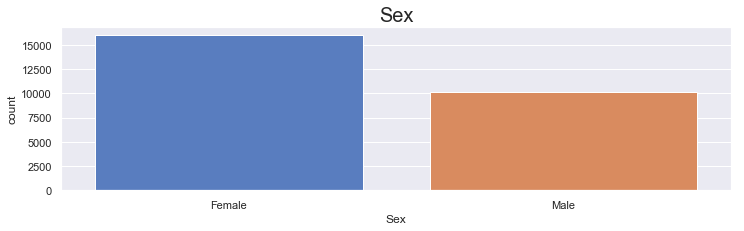

<Figure size 864x216 with 0 Axes>

Text(0.5,1,'Figure 2: Bar Chart of Education')

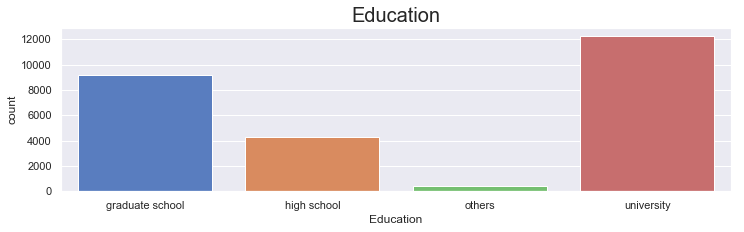

<Figure size 864x216 with 0 Axes>

Text(0.5,1,'Figure 3: Bar Chart of Marital status')

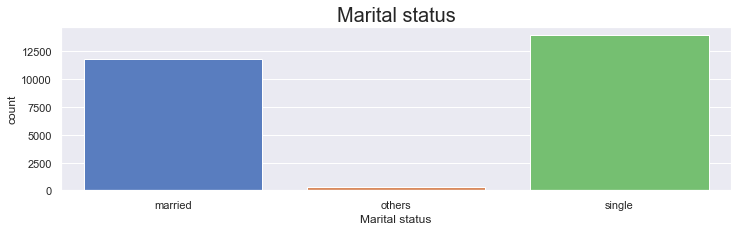

<Figure size 864x216 with 0 Axes>

Text(0.5,1,'Figure 4: Bar Chart of Pay Sep')

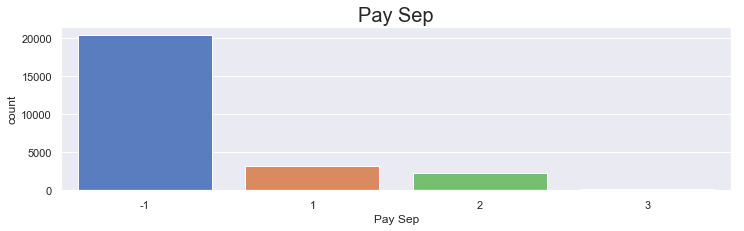

<Figure size 864x216 with 0 Axes>

Text(0.5,1,'Figure 5: Bar Chart of Pay Aug')

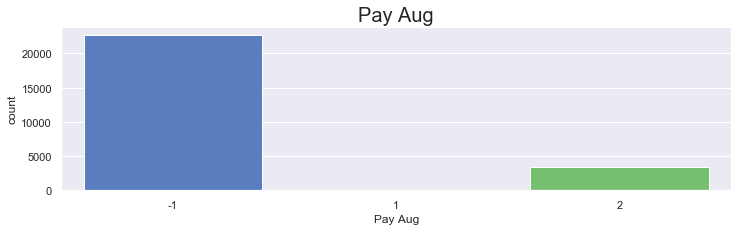

<Figure size 864x216 with 0 Axes>

Text(0.5,1,'Figure 6: Bar Chart of Pay July')

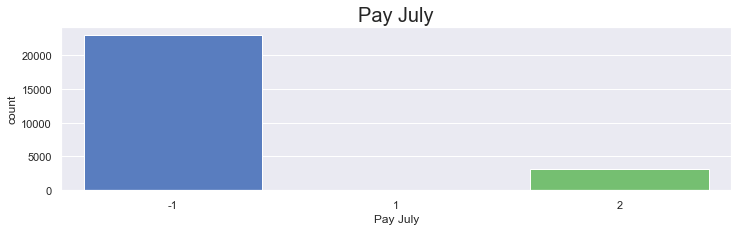

<Figure size 864x216 with 0 Axes>

Text(0.5,1,'Figure 7: Bar Chart of Pay June')

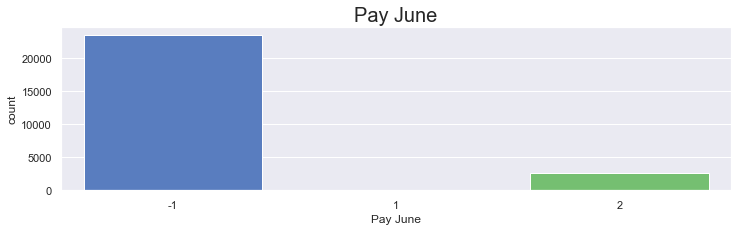

<Figure size 864x216 with 0 Axes>

Text(0.5,1,'Figure 8: Bar Chart of Pay May')

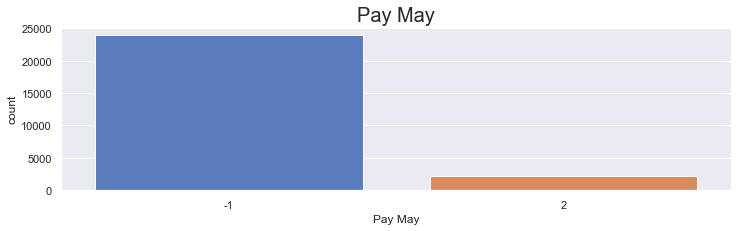

<Figure size 864x216 with 0 Axes>

Text(0.5,1,'Figure 9: Bar Chart of Pay Apr')

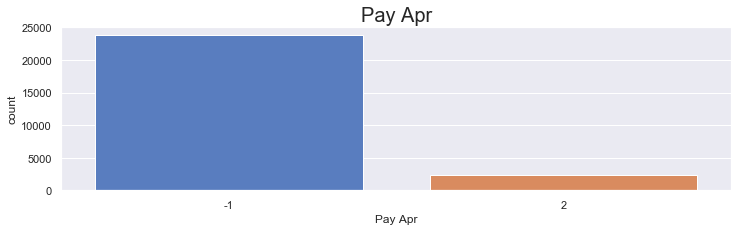

<Figure size 864x216 with 0 Axes>

Text(0.5,1,'Figure 10: Bar Chart of Default Payment')

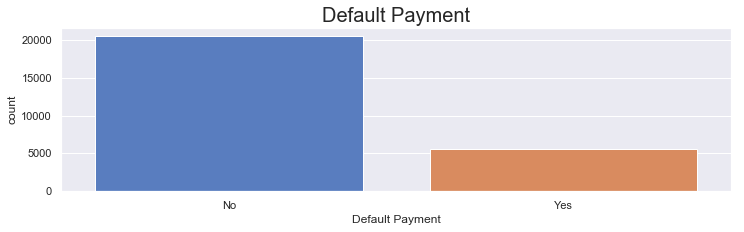

In [17]:
#Creating bar plot for all categorical variables
i = 1
for col in ['Sex', 'Education', 'Marital status', 'Pay Sep', 'Pay Aug', 'Pay July', 
            'Pay June', 'Pay May', 'Pay Apr', 'Default Payment']:
    plt.figure(figsize=(12,3))
    plt.title("Figure " + str(i) + ": Bar Chart of " + col, fontsize = 12)
    BarPlot(col)
    plt.show()
    i = i + 1

Text(0.5,0.98,'Figure 11: Histogram and Box Plot of Age')

<Figure size 432x288 with 0 Axes>

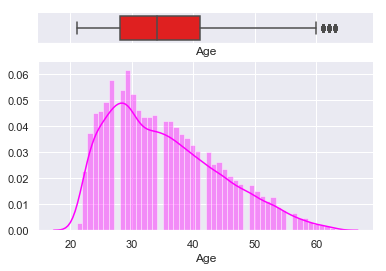

Text(0.5,0.98,'Figure 12: Histogram and Box Plot of Balance Limit')

<Figure size 432x288 with 0 Axes>

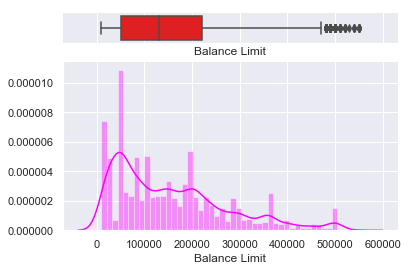

Text(0.5,0.98,'Figure 13: Histogram and Box Plot of Bill Amt Apr')

<Figure size 432x288 with 0 Axes>

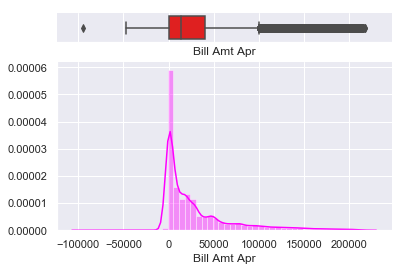

Text(0.5,0.98,'Figure 14: Histogram and Box Plot of Bill Amt Aug')

<Figure size 432x288 with 0 Axes>

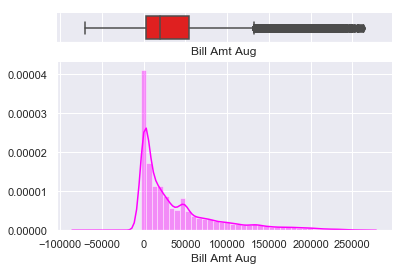

Text(0.5,0.98,'Figure 15: Histogram and Box Plot of Bill Amt July')

<Figure size 432x288 with 0 Axes>

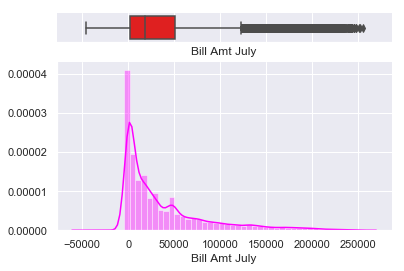

Text(0.5,0.98,'Figure 16: Histogram and Box Plot of Bill Amt June')

<Figure size 432x288 with 0 Axes>

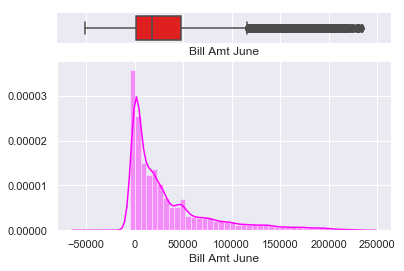

Text(0.5,0.98,'Figure 17: Histogram and Box Plot of Bill Amt May')

<Figure size 432x288 with 0 Axes>

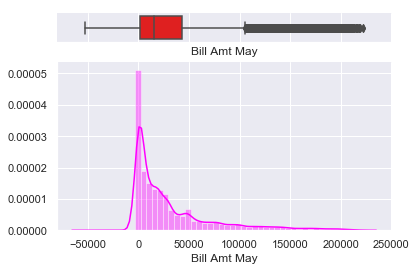

Text(0.5,0.98,'Figure 18: Histogram and Box Plot of Bill Amt Sep')

<Figure size 432x288 with 0 Axes>

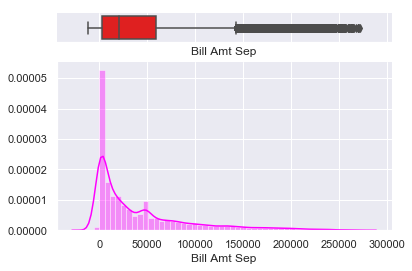

Text(0.5,0.98,'Figure 19: Histogram and Box Plot of Prev Pay Amt Apr')

<Figure size 432x288 with 0 Axes>

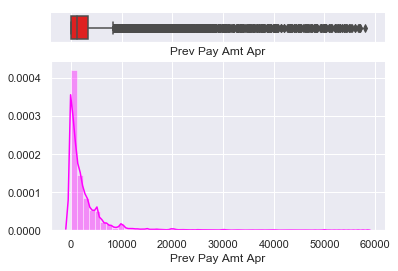

Text(0.5,0.98,'Figure 20: Histogram and Box Plot of Prev Pay Amt Aug')

<Figure size 432x288 with 0 Axes>

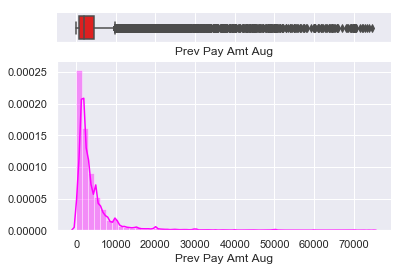

Text(0.5,0.98,'Figure 21: Histogram and Box Plot of Prev Pay Amt July')

<Figure size 432x288 with 0 Axes>

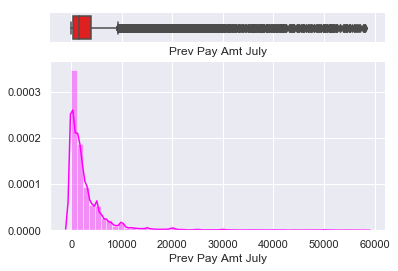

Text(0.5,0.98,'Figure 22: Histogram and Box Plot of Prev Pay Amt June')

<Figure size 432x288 with 0 Axes>

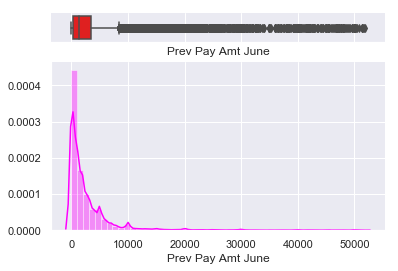

Text(0.5,0.98,'Figure 23: Histogram and Box Plot of Prev Pay Amt May')

<Figure size 432x288 with 0 Axes>

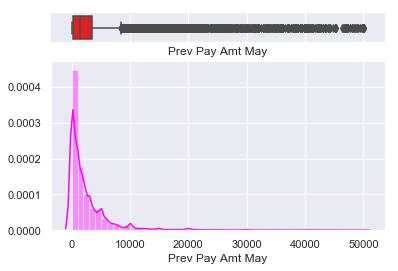

Text(0.5,0.98,'Figure 24: Histogram and Box Plot of Prev Pay Amt Sep')

<Figure size 432x288 with 0 Axes>

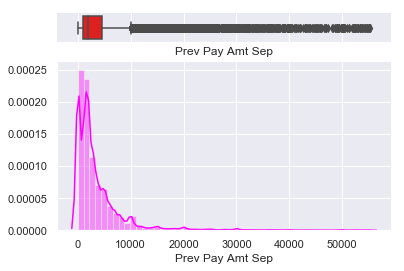

In [18]:
#Creating boxplot and histogram combined for all numeric variables
for col in ['Age', 'Balance Limit', 'Bill Amt Apr', 'Bill Amt Aug', 'Bill Amt July',
             'Bill Amt June', 'Bill Amt May', 'Bill Amt Sep','Prev Pay Amt Apr',
             'Prev Pay Amt Aug', 'Prev Pay Amt July', 'Prev Pay Amt June', 'Prev Pay Amt May',
             'Prev Pay Amt Sep']:
    plt.suptitle("Figure " + str(i) + ": Histogram and Box Plot of " + col)
    BoxAndHistogramPlot(Bank_data[col])
    plt.show()
    i = 1 + i

### Explorartion for the relationship between all pairs of attributes

In [19]:
#Defining function to create bar plot to compare two variables
def BarPlotCategory(x,i):
    yCounts = (Bank_data.groupby([x])['Default Payment']
                    .value_counts(normalize=True)
                    .rename('Proportions')
                    .reset_index())

    data1 = yCounts.loc[yCounts['Default Payment']=='Yes','Proportions']
    data2 = yCounts.loc[yCounts['Default Payment']=='No','Proportions']

    N = len(Bank_data[x].unique())
    ind = np.arange(N)  # the x locations for the groups
    width = 0.40        # the width of the bars

    #plt.figure(figsize=(10,4))
    size = 10 if N < 10 else N

    fig, ax = plt.subplots(figsize=(size,5))
    rects1 = ax.bar(ind, data1, width, color='r', alpha = 0.5,edgecolor='blue')
    rects2 = ax.bar(ind + width + 0.01, data2, width - 0.1, color='g', 
                    alpha = 0.5,edgecolor='blue')

    ax.set_ylabel('Proportion')
    ax.set_title("Figure " + str(i) +': Default Payment by ' + x, fontsize = 12)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(Bank_data[x].unique())
    ax.set_xlabel(x)

    ax.legend((rects1[0], rects2[0]), ('Yes', 'No'))
    plt.show()

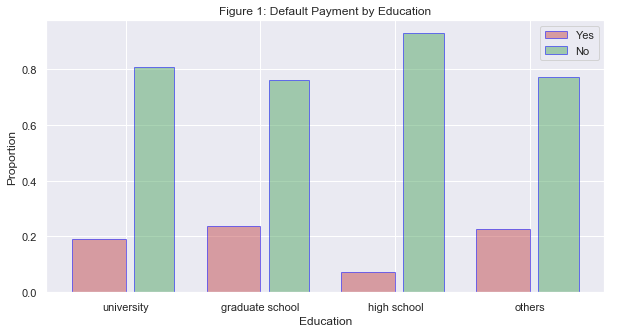

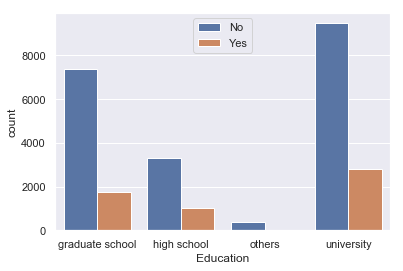

In [20]:
#Hypothesis - 1 : •	Does education have any impact on chances of default?
i = 1

BarPlotCategory('Education',i)

ax = sns.countplot(x="Education", hue="Default Payment", data=Bank_data)
ax.legend(loc='upper center')

[35725.71796372155, 34328.30450032678]


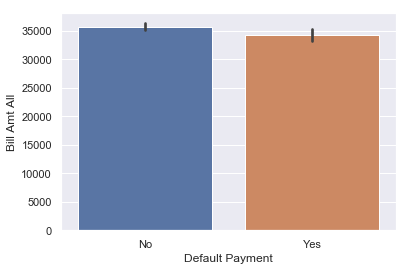

In [21]:
#Hypothesis - 2 : Is bill amount for default cards higher?
Bank_data['Bill Amt All'] = (Bank_data['Bill Amt Sep'] + Bank_data['Bill Amt Aug'] + Bank_data['Bill Amt July'] +
                            Bank_data['Bill Amt June'] + Bank_data['Bill Amt May'] + Bank_data['Bill Amt Apr'])/6

print(list(Bank_data['Bill Amt All'].groupby(Bank_data['Default Payment']).mean()))

ax = sns.barplot(x="Default Payment", y="Bill Amt All", data=Bank_data)


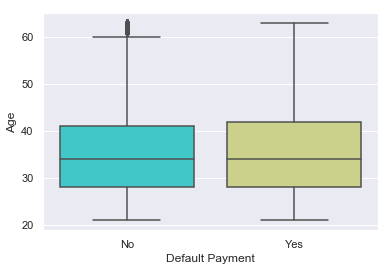

In [22]:
#Hypothesis - 3 : Do the chances of default vary in different age groups?

sns.boxplot(x='Default Payment',y='Age',data=Bank_data,palette='rainbow')

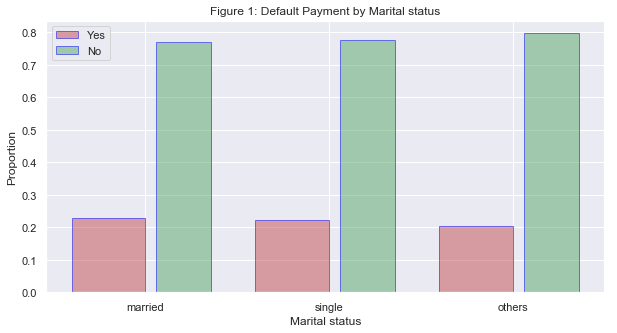

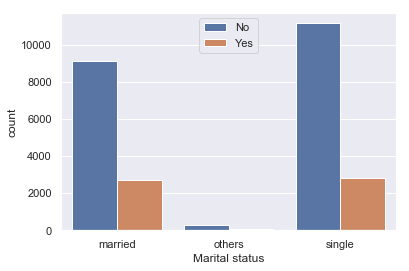

In [23]:
#Hypothesis - 4 : Does Marital Status have any Impact on the chance of Default?

BarPlotCategory('Marital status',i)

ax = sns.countplot(x="Marital status", hue="Default Payment", data=Bank_data)
ax.legend(loc='upper center')

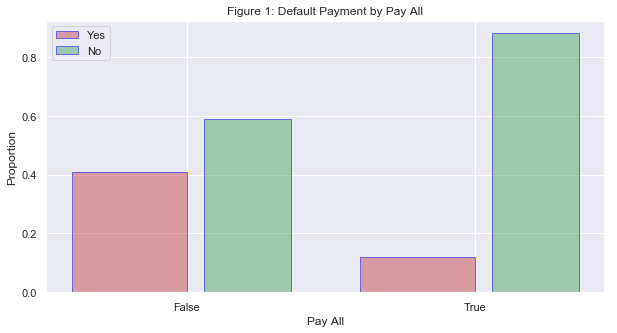

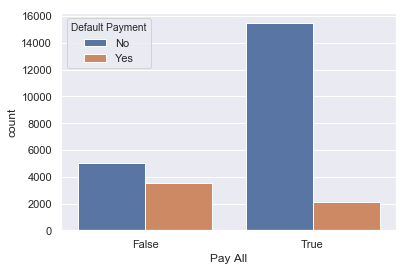

In [24]:
#Hypothesis - 5 : Does having a delay, even for 1 month in any of the previous months, increases the chance of default?

Bank_data1 = Bank_data.loc[:,'Pay Sep':'Pay Apr']

test = pd.DataFrame(np.all(Bank_data1 == -1, axis=1),columns=['Pay All'])

Bank_data['Pay All'] = test['Pay All']

BarPlotCategory('Pay All',i)
ax = sns.countplot(x="Pay All", hue="Default Payment", data=Bank_data) 

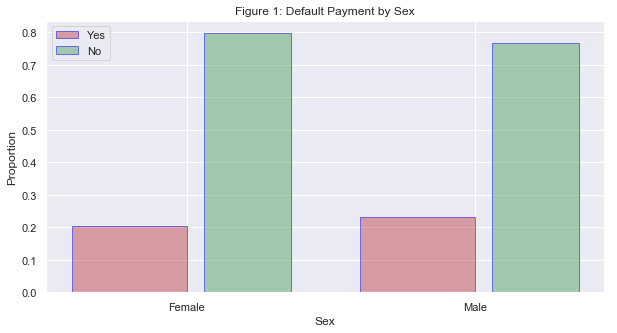

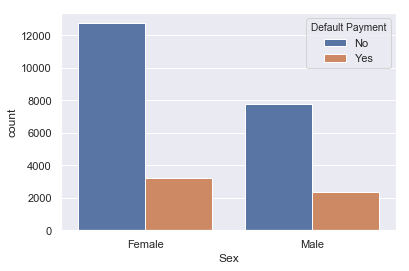

In [25]:
#Hypothesis - 6 : Do Gender have any Impact on the chance of Default?

BarPlotCategory('Sex',i)

ax = sns.countplot(x="Sex", hue="Default Payment", data=Bank_data)

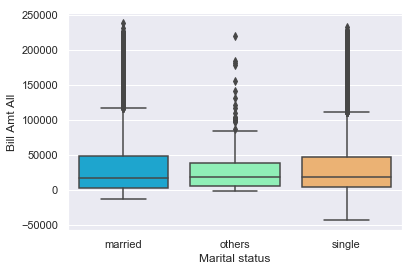

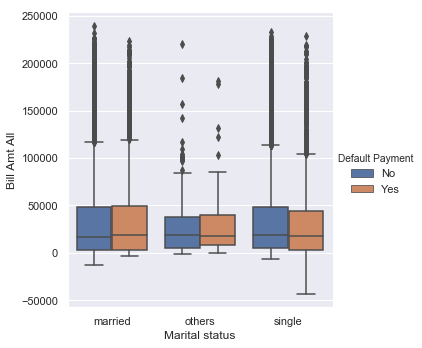

In [26]:
#Hypothesis - 7 : Do Married people spend more than others?

sns.boxplot(x='Marital status',y='Bill Amt All',data=Bank_data,palette='rainbow')

sns.catplot(x='Marital status', y='Bill Amt All', hue='Default Payment', kind='box', data=Bank_data);

<Figure size 1440x288 with 0 Axes>

C:\Users\Salina\Anaconda2\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


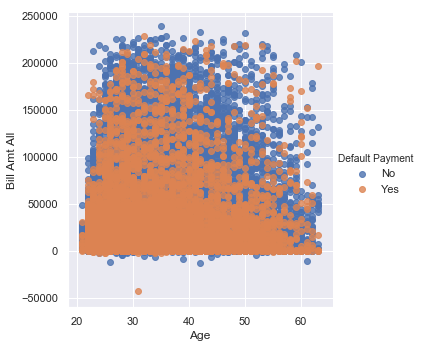

<Figure size 1440x288 with 0 Axes>

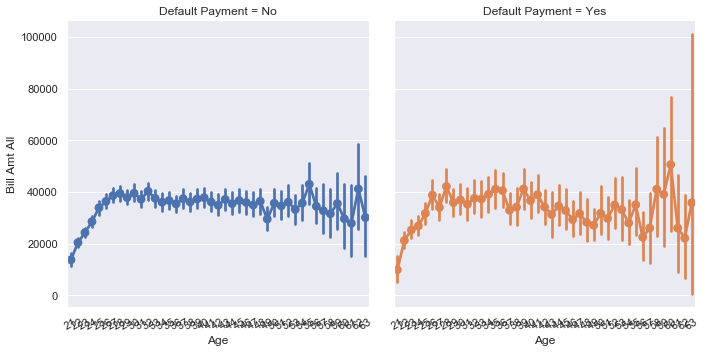

In [27]:
#Hypothesis - 8 : Do spending habbits varies in different age groups?


sns.lmplot(x='Age', y='Bill Amt All', data=Bank_data, fit_reg=False, hue='Default Payment')

plt.figure(figsize=(20,4))

g = sns.factorplot(x='Age', 
                   y='Bill Amt All', 
                   data=Bank_data, 
                   hue='Default Payment',  # Color by stage
                   col='Default Payment',  # Separate by stage
                   kind='point',
                   width=20) # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=30)

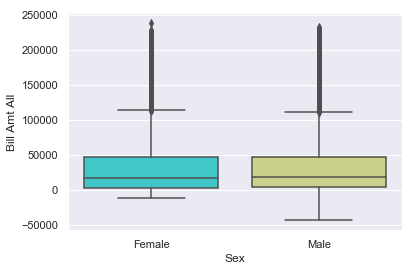

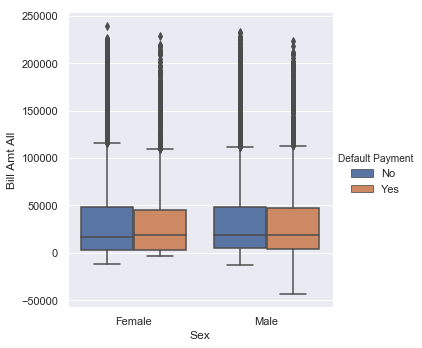

In [28]:
#Hypothesis - 9 : Do Women tend to spend more than men?

sns.boxplot(x='Sex',y='Bill Amt All',data=Bank_data,palette='rainbow')

sns.catplot(x='Sex', y='Bill Amt All', hue='Default Payment', kind='box', data=Bank_data);

In [29]:
#Hypothesis - 10 : Do Payment delays are dependent on Age, Gender Or Marital Status of the Person.

def BarPlotCategory_Pay(x,i):
    
    yCounts = (Bank_data.groupby([x])['Pay All']
                    .value_counts(normalize=True)
                    .rename('Proportions')
                    .reset_index())

    data1 = yCounts.loc[yCounts['Pay All']==False,'Proportions']
    data2 = yCounts.loc[yCounts['Pay All']==True,'Proportions']

    N = len(Bank_data[x].unique())
    ind = np.arange(N)  # the x locations for the groups
    width = 0.40        # the width of the bars


    size = 10 if N < 10 else N

    fig, ax = plt.subplots(figsize=(size,5))
    rects1 = ax.bar(ind, data1, width, color='r', alpha = 0.5,edgecolor='blue')
    rects2 = ax.bar(ind + width + 0.01, data2, width - 0.1, color='g', 
                    alpha = 0.5,edgecolor='blue')

    ax.set_ylabel('Proportion')
    ax.set_title("Figure " + str(i) +': Pay All: by ' + x, fontsize = 12)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(Bank_data[x].unique())
    ax.set_xlabel(x)

    ax.legend((rects1[0], rects2[0]), ('False', 'True'))
    plt.show()

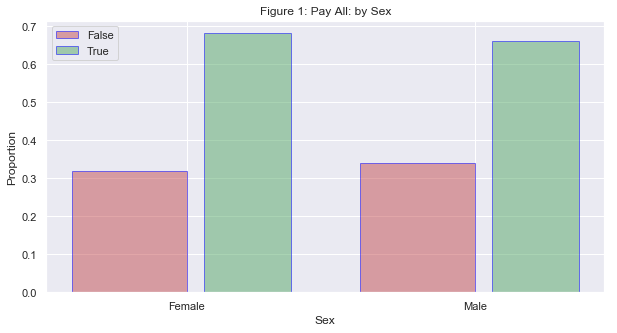

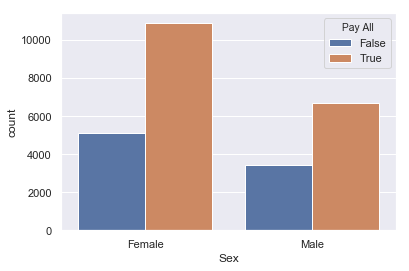

In [30]:
#Comparing payment delay and Sex
BarPlotCategory_Pay('Sex',i)

ax = sns.countplot(x="Sex", hue="Pay All", data=Bank_data)

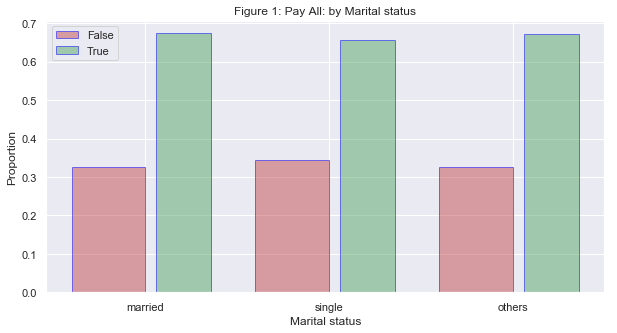

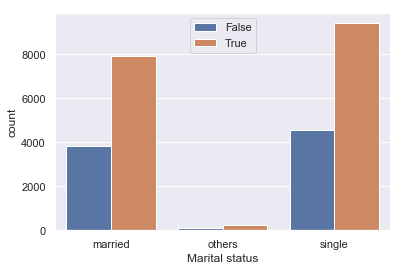

In [31]:
#Comparing payment delay and Marital status
BarPlotCategory_Pay('Marital status',i)

ax = sns.countplot(x="Marital status", hue="Pay All", data=Bank_data)
ax.legend(loc='upper center')

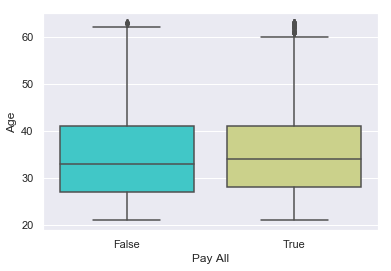

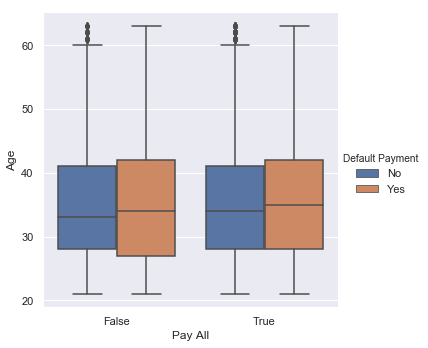

In [32]:
#Comparing payment delay and Age
sns.boxplot(x='Pay All',y='Age',data=Bank_data,palette='rainbow')

sns.catplot(x='Pay All', y='Age', hue='Default Payment', kind='box', data=Bank_data);

In [33]:
#Replacing labels with numeric values for further use in data modelling
Bank_data['Sex'] = Bank_data['Sex'].replace(['Female','Male'],[2, 1])
Bank_data['Education'] = Bank_data['Education'].replace(['graduate school','university','high school','others'],[1, 2, 3, 4])
Bank_data['Marital status'] = Bank_data['Marital status'].replace(['married','single','others'],[1, 2, 3])
Bank_data['Default Payment'] = Bank_data['Default Payment'].replace(['No','Yes'], [0, 1])

## Data Modelling

In [34]:
#Applying MinMaxScaler to scale all the variables
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

Bank_data[['Age', 'Balance Limit', 'Bill Amt Apr', 'Bill Amt Aug', 'Bill Amt July',
             'Bill Amt June', 'Bill Amt May', 'Bill Amt Sep','Prev Pay Amt Apr',
             'Prev Pay Amt Aug', 'Prev Pay Amt July', 'Prev Pay Amt June', 'Prev Pay Amt May',
             'Prev Pay Amt Sep']] = scaler.fit_transform(Bank_data[
                                    ['Age', 'Balance Limit', 'Bill Amt Apr', 'Bill Amt Aug', 'Bill Amt July',
                                     'Bill Amt June', 'Bill Amt May', 'Bill Amt Sep','Prev Pay Amt Apr',
                                     'Prev Pay Amt Aug', 'Prev Pay Amt July', 'Prev Pay Amt June', 'Prev Pay Amt May',
                                     'Prev Pay Amt Sep']])

C:\Users\Salina\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [35]:
#Splitting target data
x_data = Bank_data.drop(columns = ['Default Payment','Pay All'])
y_target = Bank_data['Default Payment']

In [36]:
#Applying f1 score for feature selection
from sklearn import feature_selection as fs

fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=20) #finding top 20 predictors
fs_fit_fscore.fit_transform(x_data, y_target)
fs_indices_fscore = np.argsort(fs_fit_fscore.scores_)[::-1][0:20]
fs_indices_fscore

array([[0.018518518518518517, 2L, 2L, ..., 0.0, 0.0, 0.0],
       [0.20370370370370372, 2L, 2L, ..., 0.019305019305019305, 0.0,
        0.034482758620689655],
       [0.14814814814814814, 2L, 2L, ..., 0.019305019305019305,
        0.01994534974170772, 0.08620689655172414],
       ...,
       [0.38888888888888884, 1L, 3L, ..., 0.05882239382239383,
        0.0997267487085386, 0.017241379310344827],
       [0.2592592592592593, 1L, 3L, ..., 0.0024903474903474904, 0.0, 0.0],
       [0.07407407407407407, 1L, 2L, ..., 0.019305019305019305,
        0.01994534974170772, 0.017241379310344827]], dtype=object)

array([ 5,  6,  7,  8,  9, 10,  0, 17, 18, 19, 21, 20, 22,  1,  3, 11,  2,
       12,  4, 13], dtype=int64)

In [37]:
#Display top 20 features
best_features_fscore = x_data.columns[fs_indices_fscore].values
best_features_fscore

array(['Pay Sep', 'Pay Aug', 'Pay July', 'Pay June', 'Pay May', 'Pay Apr',
       'Balance Limit', 'Prev Pay Amt Sep', 'Prev Pay Amt Aug',
       'Prev Pay Amt July', 'Prev Pay Amt May', 'Prev Pay Amt June',
       'Prev Pay Amt Apr', 'Sex', 'Marital status', 'Bill Amt Sep',
       'Education', 'Bill Amt Aug', 'Age', 'Bill Amt July'], dtype=object)

In [38]:
#Display f1-score for features
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([4547.30947848, 2741.16368129, 1851.89850926, 1644.13739504,
       1480.82504852, 1207.55556844,  508.55442686,  274.91636438,
        261.21929347,  221.70989675,  171.55461327,  160.92264423,
        150.21016566,   33.32265566,   21.06575033,   21.06453872,
         15.43005808,    8.38871969,    5.09899382,    4.58271546])

In [39]:
#Plotting feature engineering graph
def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    fig, ax = plt.subplots(figsize=(15,5))
    g = sns.barplot(ax=ax,x="features", y="importances", data=df)
    g.set_xticklabels(ax.get_xticklabels(),rotation=30)

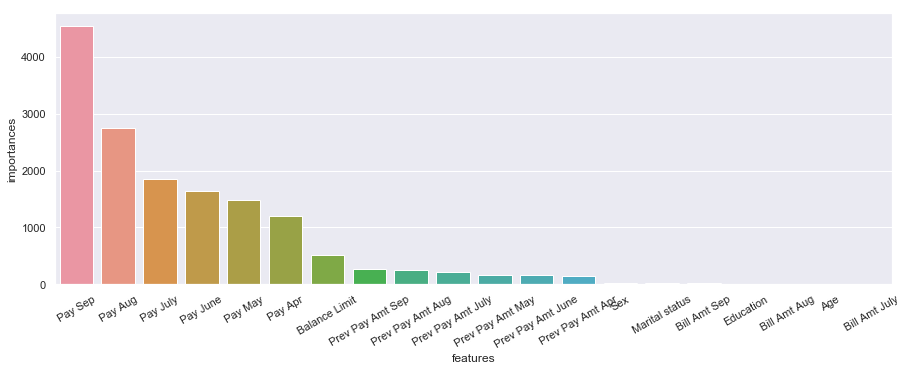

In [40]:
plot_imp(best_features_fscore, feature_importances_fscore, 'F-Score', 'red')

In [41]:
#Considering only top 20 variables for data modelling
x_data = x_data[x_data.columns[fs_indices_fscore][0:13].values]

In [42]:
#DecisionTree classification model
from sklearn.model_selection import train_test_split 
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree

def Dectreeclassifier(itr, size, x_data, y_target):
    #Generating train/test dataset
    X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(x_data, y_target, test_size = size, random_state = 0) 
    print('\n')
    print('Decision Tree Classification model:' + itr + '\n')
    print('Training data')
    print X_train_dt.shape
    print('')
    print('Test data')
    print X_test_dt.shape

    #Applying Decision tree classifier

    tree_para = {'criterion':['gini','entropy'],'max_depth':range(3,10,1)}
    classifier = GridSearchCV(DecisionTreeClassifier(random_state=0), tree_para, cv=5) #Using GridSearchCV for selecting best parameter set
    classifier.fit(X_train_dt, y_train_dt)

    #Display best parameter sets found using GridSearchCV
    print('')
    print("Best parameters set found on development set:")
    print('')
    print(classifier.best_params_)
    print('')
    means = classifier.cv_results_['mean_test_score']
    stds = classifier.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, classifier.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

    print('')
    y_pred_dt = classifier.predict(X_test_dt)
    
    classifier.predict_proba(X_test_dt)
      
    #Checking performance of classification model
    print('')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test_dt, y_pred_dt)) 
    print('')
    print('Classification Report:')
    print(classification_report(y_test_dt, y_pred_dt)) 
    print('Accuracy Score:')
    print accuracy_score(y_test_dt, y_pred_dt)
    print('Error Rate:')
    print(str(1 - accuracy_score(y_test_dt, y_pred_dt)))


def main():
    #Applying Decision Tree on 3 set of data having different proportion of training-test data
    Dectreeclassifier('1 -> 80% data for training and 20% data for testing', 0.20, x_data, y_target)
    Dectreeclassifier('2 -> 60% data for training and 40% data for testing', 0.40, x_data, y_target)
    Dectreeclassifier('3 -> 50% data for training and 50% data for testing', 0.50, x_data, y_target)
    
main()

ImportError: No module named graphviz

In [ ]:
#KNN classification model
from sklearn.model_selection import train_test_split 
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def KNNclassifier(itr, size, x_data, y_target):
    #Generating train/test dataset
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, test_size = size, random_state = 0) 
    print('\n')
    print('KNN Classification model:' + itr + '\n')
    print('Training data:')
    print X_train.shape
    print('')
    print('Test data:')
    print X_test.shape

    #Applying KNN classifier

    neighbor_para = {'n_neighbors':[3,5],'weights': ['uniform', 'distance'],'p':[1,2]}
    classifier = GridSearchCV(KNeighborsClassifier(), neighbor_para, cv= 5 )
    classifier.fit(X_train, y_train)
    
    #Display best parameters found uding GridSearchCV
    print('')
    print("Best parameters set found on development set:")
    print('')
    print(classifier.best_params_)
    print('')
    means = classifier.cv_results_['mean_test_score']
    stds = classifier.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, classifier.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    
    y_pred = classifier.predict(X_test)

    #Checking performance of classification model
    print('')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred)) 
    print('')
    print('Classification Report:')
    print(classification_report(y_test, y_pred)) 
    print('Accuracy Score:')
    print accuracy_score(y_test, y_pred)
    print('Error Rate:')
    print(str(1 - accuracy_score(y_test, y_pred)))


def main():
    #Applying KNN on 3 set of data having different proportion of training-test data
    KNNclassifier('1 -> 80% data for training and 20% data for testing', 0.20, x_data, y_target)
    KNNclassifier('2 -> 60% data for training and 40% data for testing', 0.40, x_data, y_target)
    KNNclassifier('3 -> 50% data for training and 50% data for testing', 0.50, x_data, y_target)
    
main()